Force the backend to be present time graphical before imported code sets backend to agg.

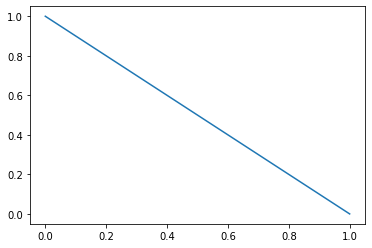

In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()

In [2]:
# coding: utf-8
import unittest
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC
from neuronunit.optimisation import model_parameters
from elephant.spike_train_generation import threshold_detection
import quantities as pq


class testCrucialBackendsSucceed(unittest.TestCase):
    def setUp(self):
        model_parameters.MODEL_PARAMS.keys()
        self.backends =  ["RAW", "HH"]
        self.other_backends =["BHH","ADEXP"]
        self.backends_complex =  ["GLIF"]

        #raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}
        #self.backends = backends
        self.model_parameters = model_parameters
    def test_must_pass_0(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.backends:
            attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1

            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True
    def test_prefer_pass_1(self):
        fig, axs = plt.subplots(len(self.other_backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.other_backends:
            if "BHH" in b:
            
                attrs = {k:np.max(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            else:
                attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}

            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True

    def test_prefer_pass_2(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.backends_complex:
            if b in str("GLIF"):
                print(self.model_parameters.MODEL_PARAMS[b])
                attrs_ = {k:v for k,v in model_parameters.MODEL_PARAMS["GLIF"].items() if type(v) is not type(dict())}

                attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(dict()) }
                attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(None) }
                attrs_ = {k:np.mean(v) for k,v in attrs_.items() if type(v[0]) is not type(str())}
                attrs = attrs_
            else:

                attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1

            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True



consider installing pynn a heavier backend


INFO       Cache size for target "cython": 1049 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/russell/.cython/brian_extensions" directory. [brian2]


pynn python Error
Getting Rheobase data values from neuroelectro.org
http://neuroelectro.org/api/1/nes/?n=129&nlex=nlx_anat_100201&n__name=Olfactory+bulb+%28main%29+mitral+cell&e__name=Rheobase
Getting Input Resistance data values from neuroelectro.org
http://neuroelectro.org/api/1/nes/?n=129&nlex=nlx_anat_100201&n__name=Olfactory+bulb+%28main%29+mitral+cell&e__name=Input+Resistance
Getting Membrane Time Constant data values from neuroelectro.org
http://neuroelectro.org/api/1/nes/?n=129&nlex=nlx_anat_100201&n__name=Olfactory+bulb+%28main%29+mitral+cell&e__name=Membrane+Time+Constant
Getting Cell Capacitance data values from neuroelectro.org
http://neuroelectro.org/api/1/nes/?n=129&nlex=nlx_anat_100201&n__name=Olfactory+bulb+%28main%29+mitral+cell&e__name=Cell+Capacitance
Getting Resting membrane potential data values from neuroelectro.org
http://neuroelectro.org/api/1/nes/?n=129&nlex=nlx_anat_100201&n__name=Olfactory+bulb+%28main%29+mitral+cell&e__name=Resting+membrane+potential
Gettin

True

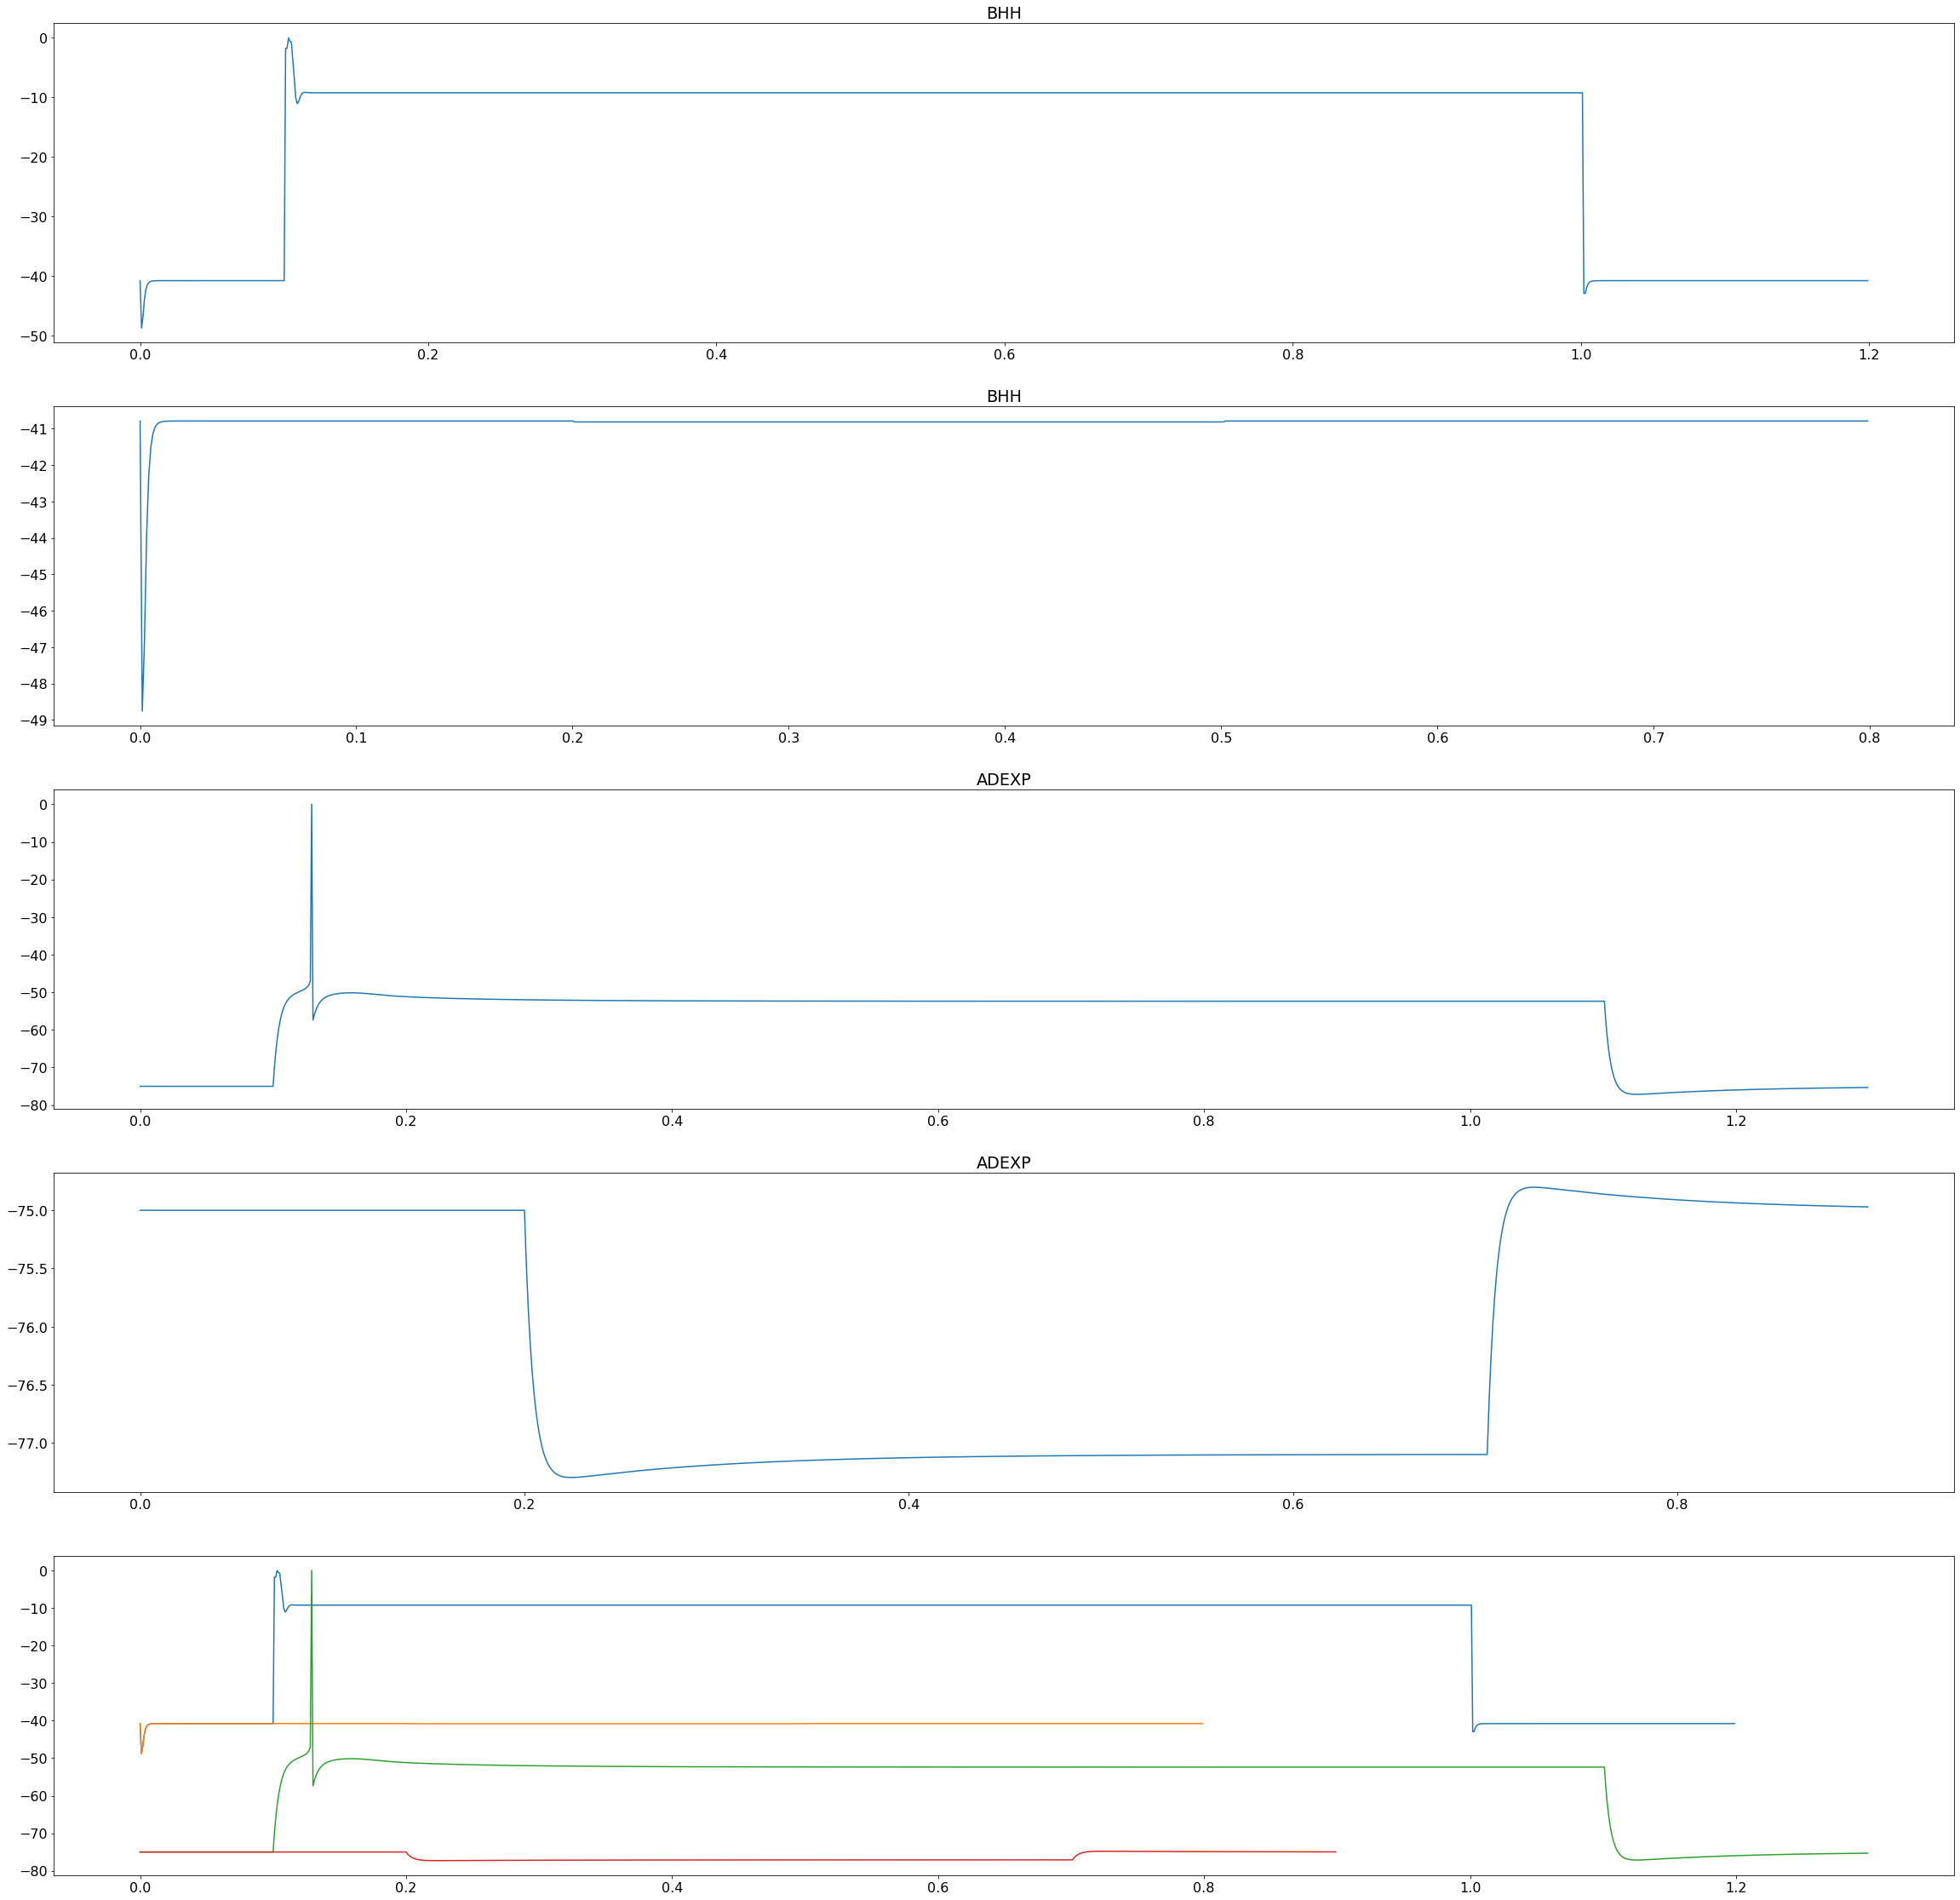

In [3]:
a = testCrucialBackendsSucceed()
a.setUp()
a.test_prefer_pass_1()

{'El_reference': [-0.08569469261169435, -0.05463626766204832], 'C': [3.5071610042390286e-11, 7.630189223327981e-10], 'init_threshold': [0.009908733642683513, 0.04939040414685865], 'threshold_reset_method': {'params': {}, 'name': 'inf'}, 'th_inf': [0.009908733642683513, 0.04939040414685865], 'spike_cut_length': [20, 199], 'init_AScurrents': [0.0, 0.0], 'init_voltage': [-70.0, 0.0], 'threshold_dynamics_method': {'params': {}, 'name': 'inf'}, 'voltage_reset_method': {'params': {}, 'name': 'zero'}, 'extrapolation_method_name': ['endpoints', 'endpoints'], 'dt': [5e-05, 5e-05], 'voltage_dynamics_method': {'params': {}, 'name': 'linear_forward_euler'}, 'El': [0.0, 0.0], 'asc_tau_array': [[0.01, 0.0033333333333333335], [0.3333333333333333, 0.1]], 'R_input': [27743752.593817078, 1792774179.3647704], 'AScurrent_dynamics_method': {'params': {}, 'name': 'none'}, 'AScurrent_reset_method': {'params': {}, 'name': 'none'}, 'dt_multiplier': [10, 10], 'th_adapt': None, 'coeffs': {'a': 1, 'C': 1, 'b': 1,

INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 30


True

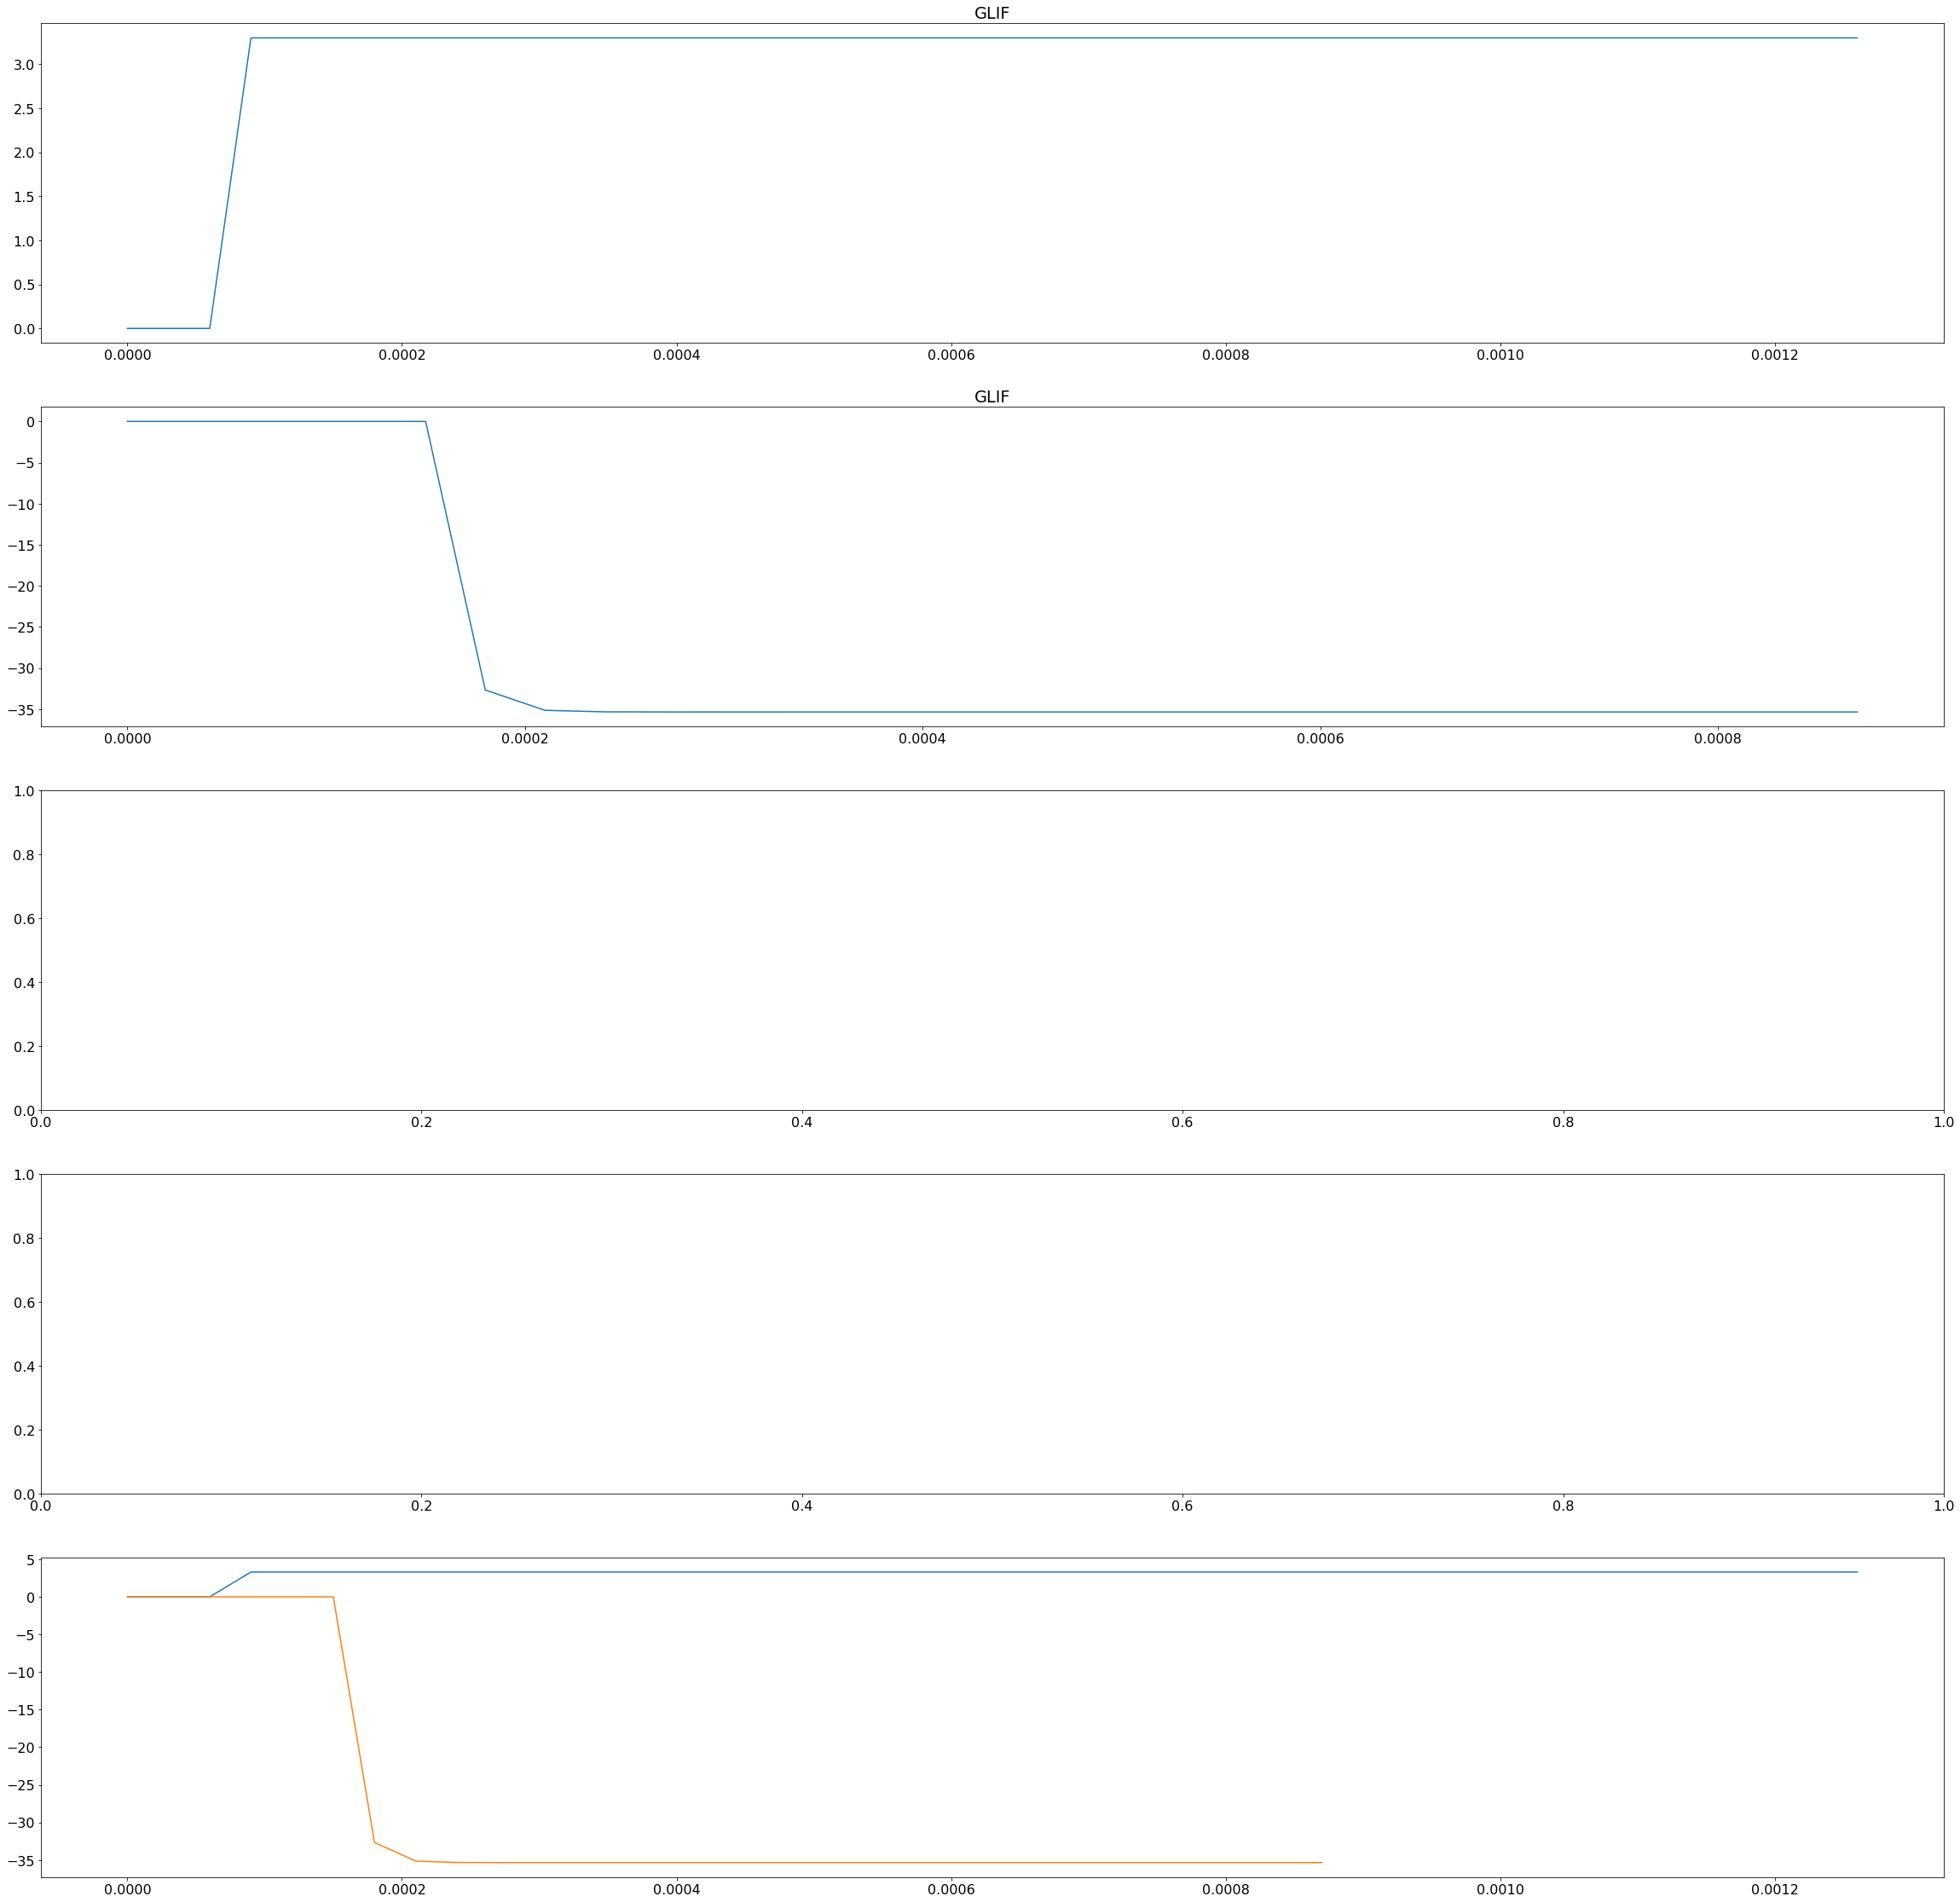

In [4]:
a.test_prefer_pass_2()

True

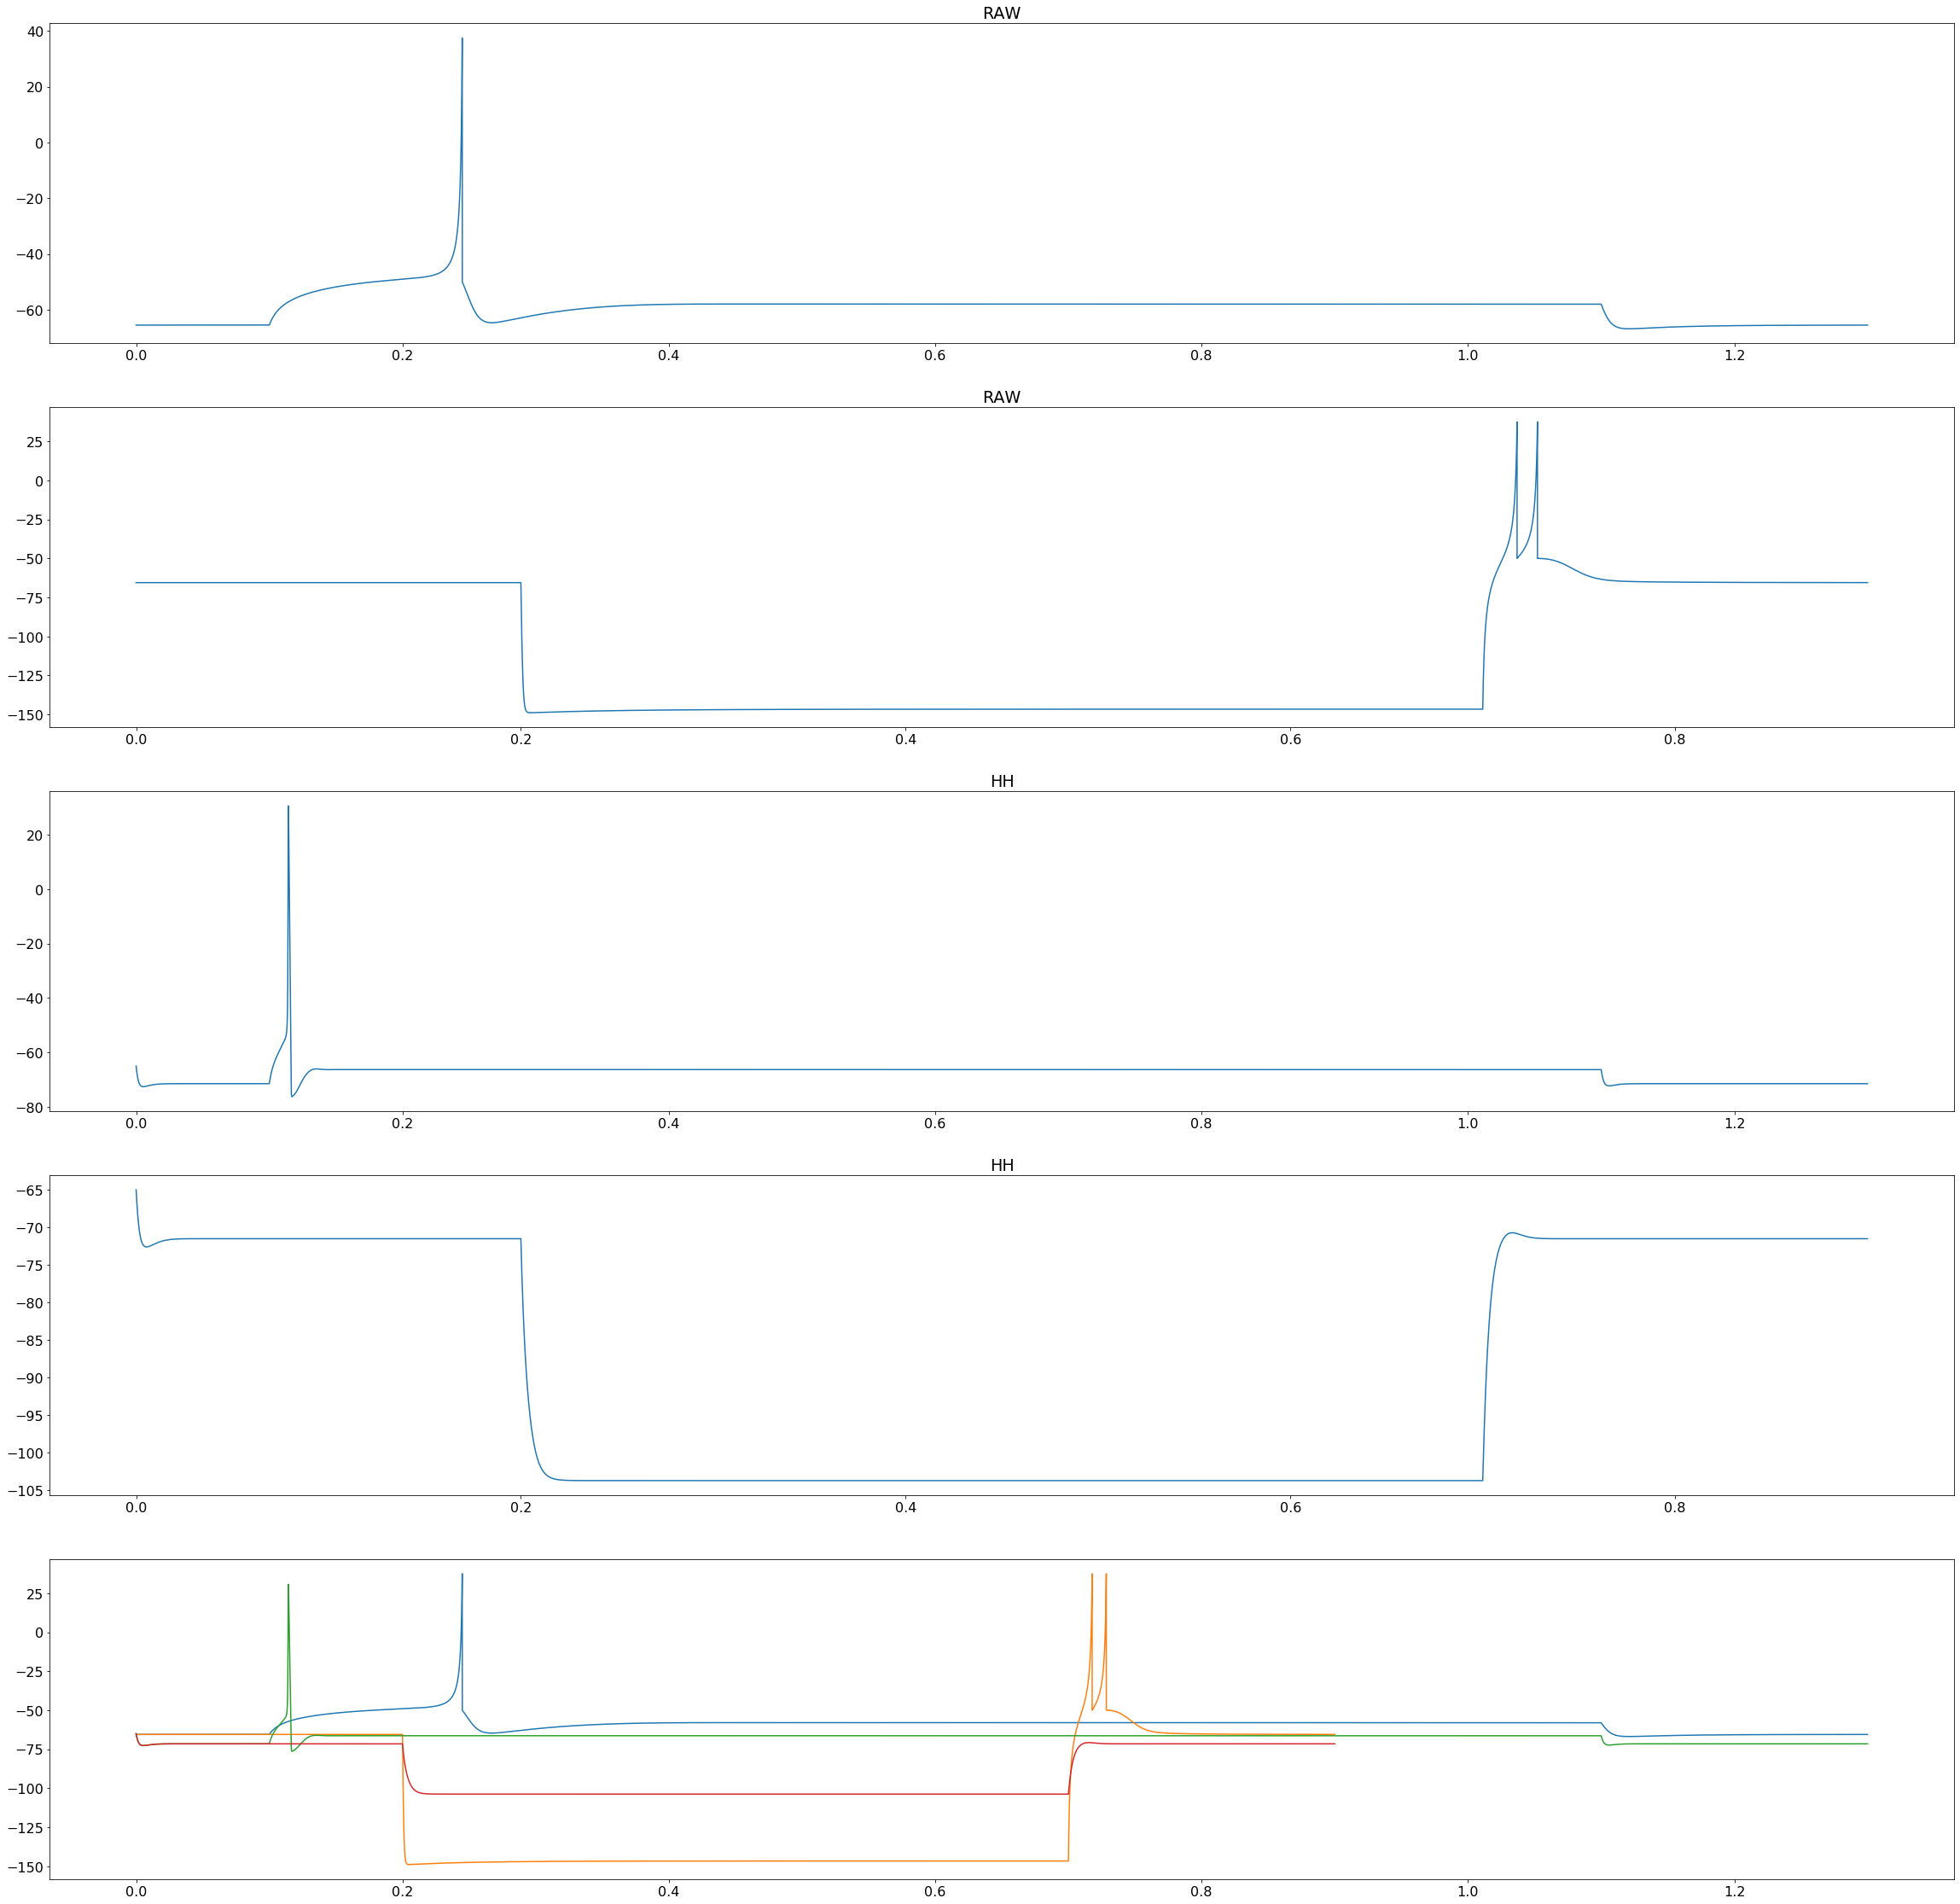

In [6]:
a.test_must_pass_0()

{'El_reference': [-0.08569469261169435, -0.05463626766204832], 'C': [3.5071610042390286e-11, 7.630189223327981e-10], 'init_threshold': [0.009908733642683513, 0.04939040414685865], 'threshold_reset_method': {'params': {}, 'name': 'inf'}, 'th_inf': [0.009908733642683513, 0.04939040414685865], 'spike_cut_length': [20, 199], 'init_AScurrents': [0.0, 0.0], 'init_voltage': [-70.0, 0.0], 'threshold_dynamics_method': {'params': {}, 'name': 'inf'}, 'voltage_reset_method': {'params': {}, 'name': 'zero'}, 'extrapolation_method_name': ['endpoints', 'endpoints'], 'dt': [5e-05, 5e-05], 'voltage_dynamics_method': {'params': {}, 'name': 'linear_forward_euler'}, 'El': [0.0, 0.0], 'asc_tau_array': [[0.01, 0.0033333333333333335], [0.3333333333333333, 0.1]], 'R_input': [27743752.593817078, 1792774179.3647704], 'AScurrent_dynamics_method': {'params': {}, 'name': 'none'}, 'AScurrent_reset_method': {'params': {}, 'name': 'none'}, 'dt_multiplier': [10, 10], 'th_adapt': None, 'coeffs': {'a': 1, 'C': 1, 'b': 1,

INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 43
INFO:root:time step 0 / 30


True

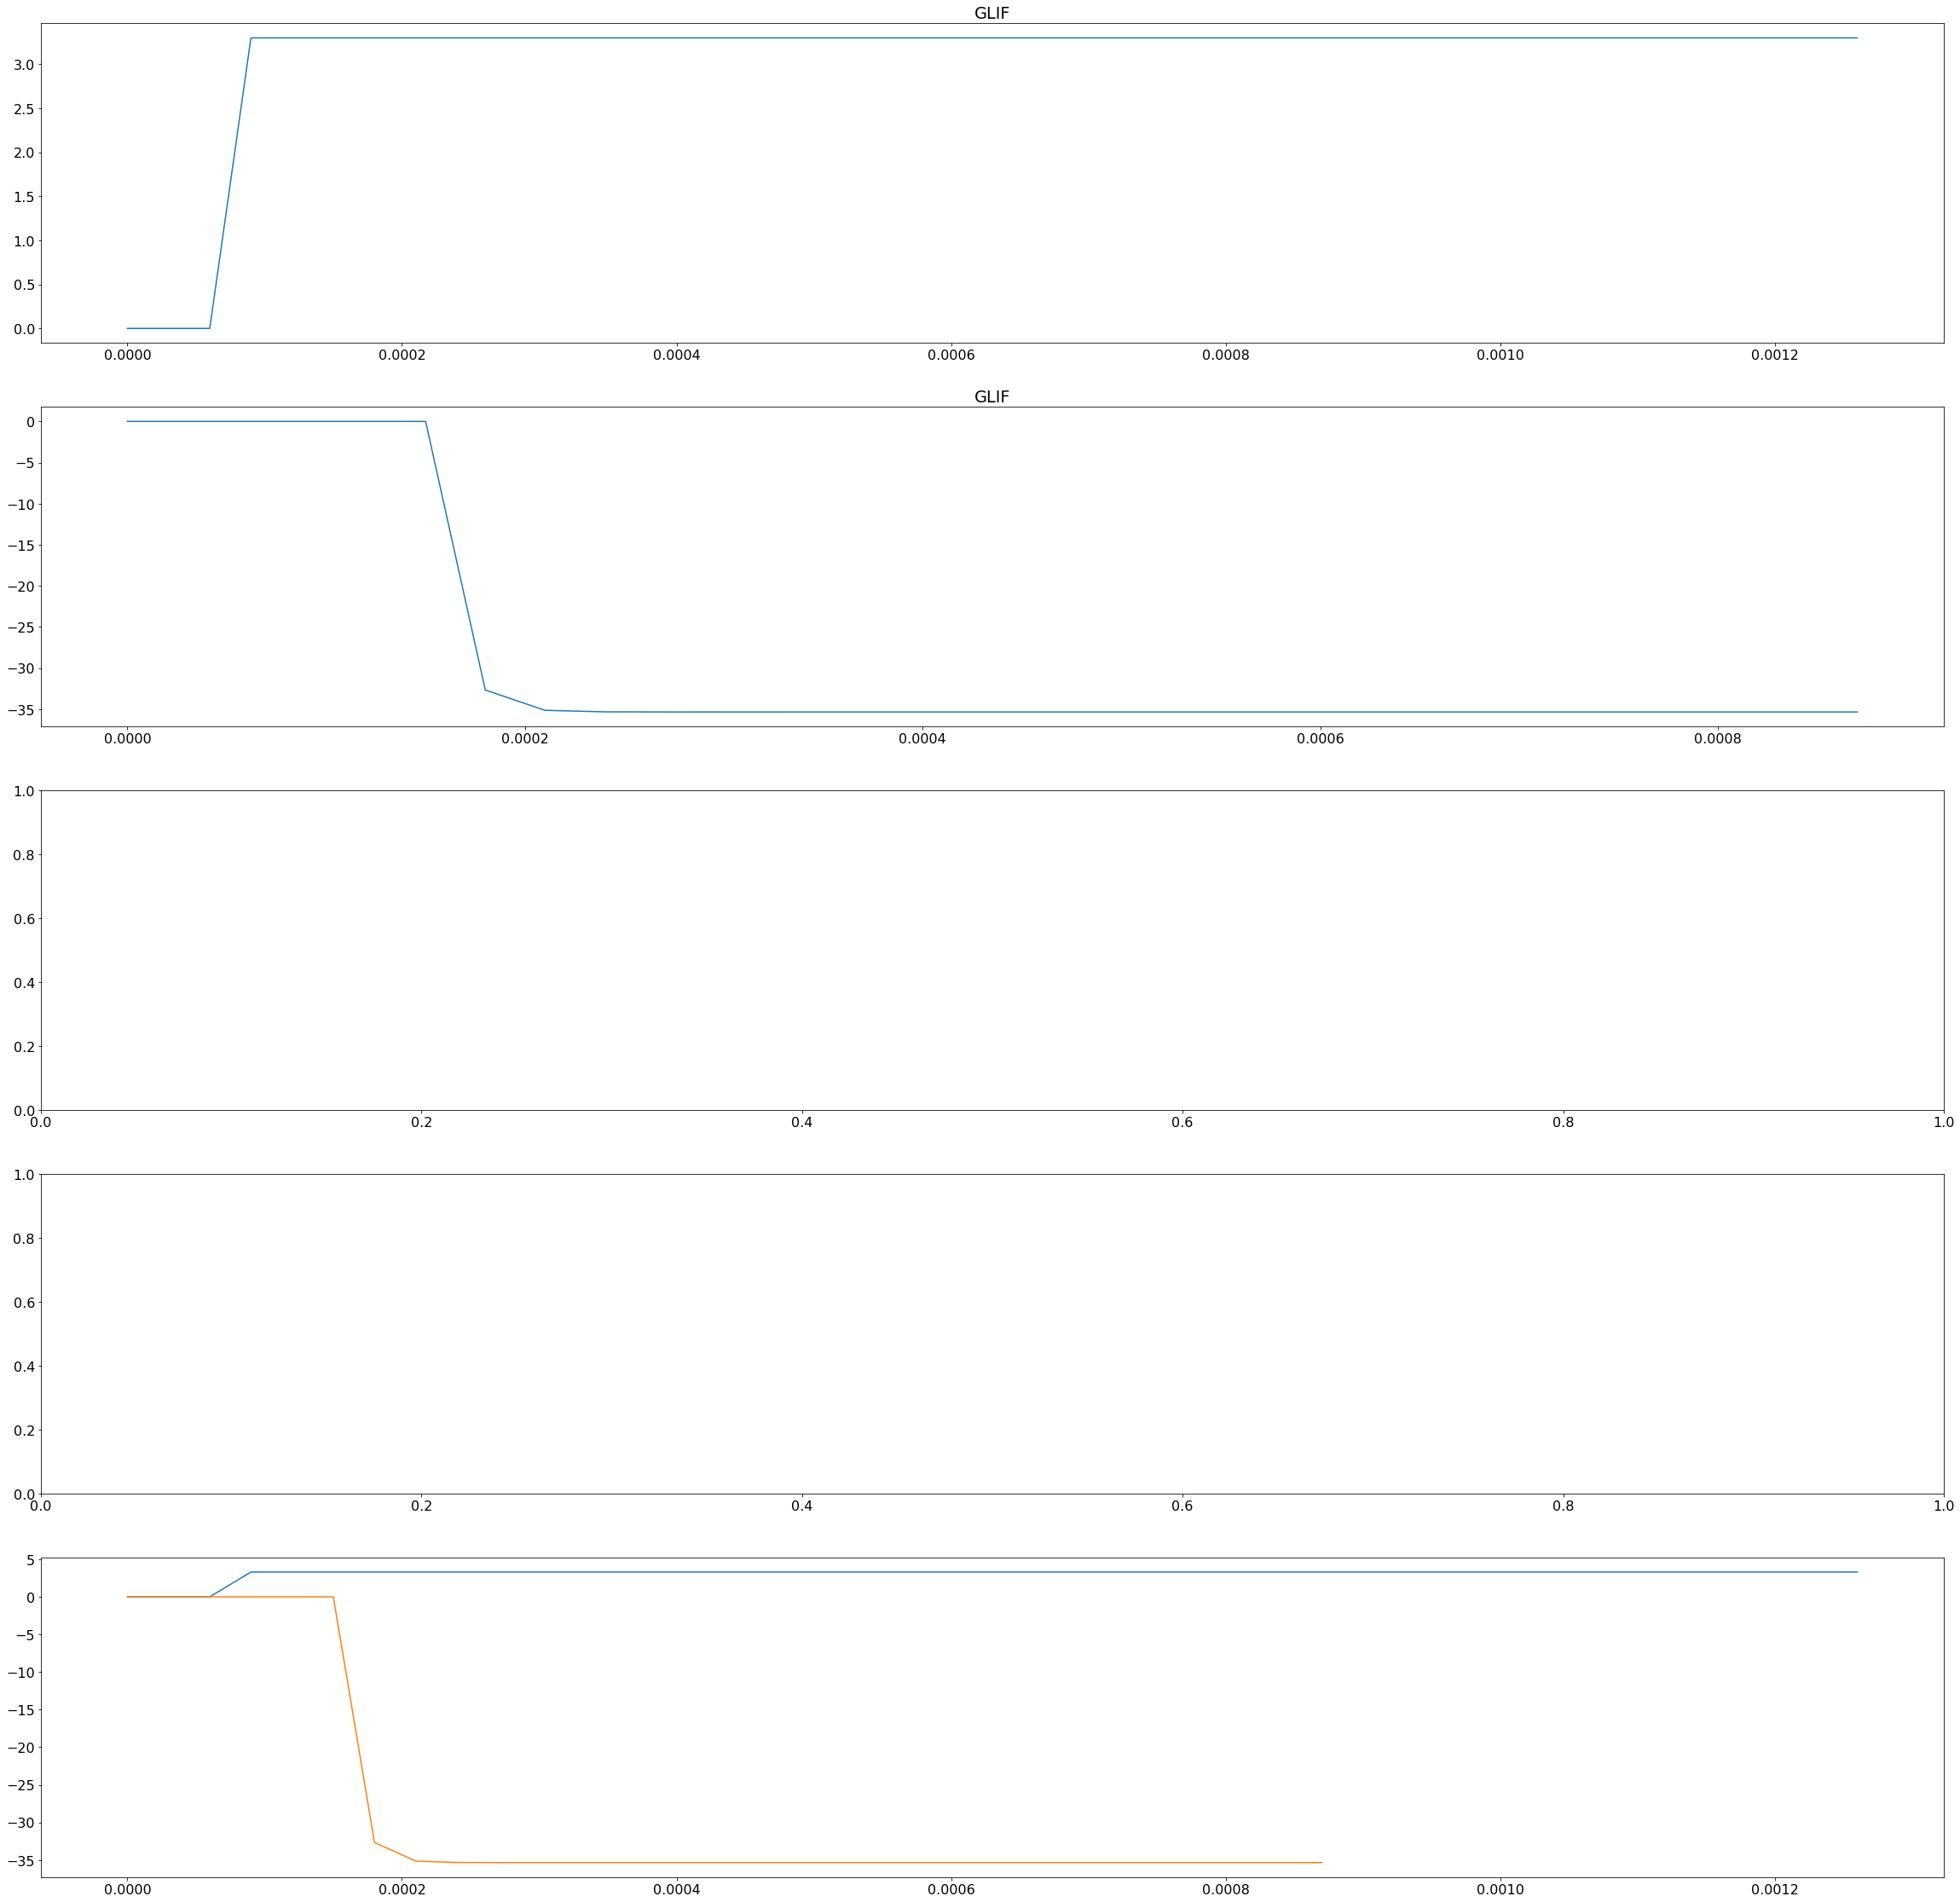

In [5]:
a.test_prefer_pass_2()

In [7]:
from brian2 import *

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2
M = StateMonitor(neuron, 'v', record=True)

run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')
for i in range(75, 125, 1):
    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
yticks([])
ylabel('Time [major] v (mV) [minor]')
xlabel('Position (cm)')
axis('tight')
show()


Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=53. ms for a duration of 100. ms
100. ms (100%) simulated in < 1s


IndexError: index 375 is out of bounds for axis 1 with size 153

WARNING    "i" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 75. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


MagicError: The magic network contains a mix of objects that has been run before and new objects, Brian does not know whether you want to start a new simulation or continue an old one. Consider explicitly creating a Network object. Also note that you can find out which objects will be included in a magic network with the collect() function.